In [1]:
import numpy as np

In [2]:
rate = 1
mean_service = 1
sd = 0.2

In [3]:
arrival_time = np.random.exponential(scale = 1/rate, size = 400).cumsum()
arrival_time[:10]

array([ 0.54188782,  3.66091934,  4.47298497,  5.38184735,  6.14314219,
        6.81329844,  8.38231454, 11.2338663 , 11.60631617, 12.56089911])

In [4]:
service_time = np.random.normal(loc = mean_service, scale = sd, size = 400)
service_time[:10]

array([1.1523005 , 1.0689979 , 1.06737613, 1.35252929, 0.78409678,
       0.8526431 , 0.73219846, 0.82695752, 0.777453  , 1.15054756])

In [5]:
def waiting_mean(arrival_time, service_time):
    waiting_time = []
    leaving_time = []

    waiting_time.append(0)
    leaving_time.append(arrival_time[0] + service_time[0] + waiting_time[0])

    for i in range(1, len(arrival_time)):
        waiting_time.append(max(0, leaving_time[i-1] - arrival_time[i]))
        leaving_time.append(arrival_time[i] + service_time[i] + waiting_time[i])

    mean_waiting = np.mean(waiting_time)
    return mean_waiting

In [6]:
waiting_mean(arrival_time, service_time)

4.372815400765529

(array([255., 285., 202., 115.,  70.,  34.,  26.,   8.,   4.,   1.]),
 array([ 2.24053183,  5.62178594,  9.00304004, 12.38429415, 15.76554826,
        19.14680236, 22.52805647, 25.90931058, 29.29056468, 32.67181879,
        36.05307289]),
 <BarContainer object of 10 artists>)

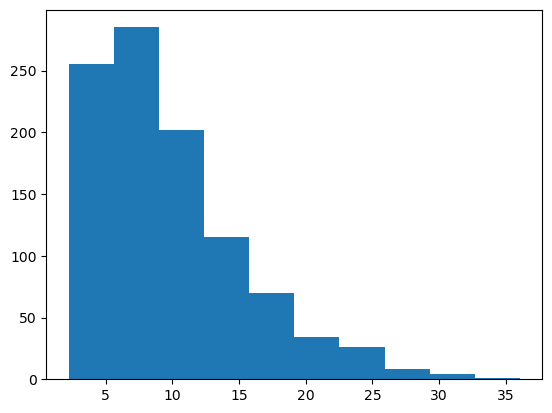

In [7]:
average_sim = []
for i in range(1000):
    arrival_time = np.random.exponential(scale = 1/rate, size = 400).cumsum()
    service_time = np.random.normal(loc = mean_service, scale = sd, size = 400)
    waiting_time = waiting_mean(arrival_time, service_time)
    average_sim.append(waiting_time)

import matplotlib.pyplot as plt
plt.hist(average_sim)

In [8]:
np.mean(average_sim)

9.8873972713748

In [9]:
np.median(average_sim)

8.505598998311342